In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import mean_squared_error,mean_absolute_error, mean_absolute_percentage_error
from sklearn.metrics import r2_score
color_pal=sns.color_palette()

In [2]:
df=pd.read_csv('product d.csv', parse_dates=['Month-Year'], index_col='Month-Year')

In [3]:
df.head()

,Product Name,Product Category,Month,Year,Sales,Market Size,Marketing Expense,Month No.
Month-Year,,,,,,,,
2019-01-01,Product D,Iron Preparation,January,2019,96684,371027,879515,1
2019-02-01,Product D,Iron Preparation,February,2019,99187,380632,902285,2
2019-03-01,Product D,Iron Preparation,March,2019,113711,436369,1034407,3
2019-04-01,Product D,Iron Preparation,April,2019,103982,399033,945904,4
2019-05-01,Product D,Iron Preparation,May,2019,101826,390760,926291,5


In [4]:
sales_d= df.drop(['Product Name','Product Category','Month','Market Size', 'Marketing Expense'],axis=1)

In [5]:
sales_d

,Year,Sales,Month No.
Month-Year,,,
2019-01-01,2019,96684,1
2019-02-01,2019,99187,2
2019-03-01,2019,113711,3
2019-04-01,2019,103982,4
2019-05-01,2019,101826,5
2019-06-01,2019,106736,6
2019-07-01,2019,91567,7
2019-08-01,2019,96918,8
2019-09-01,2019,89551,9


<Axes: title={'center': 'Product D'}, xlabel='Month-Year'>

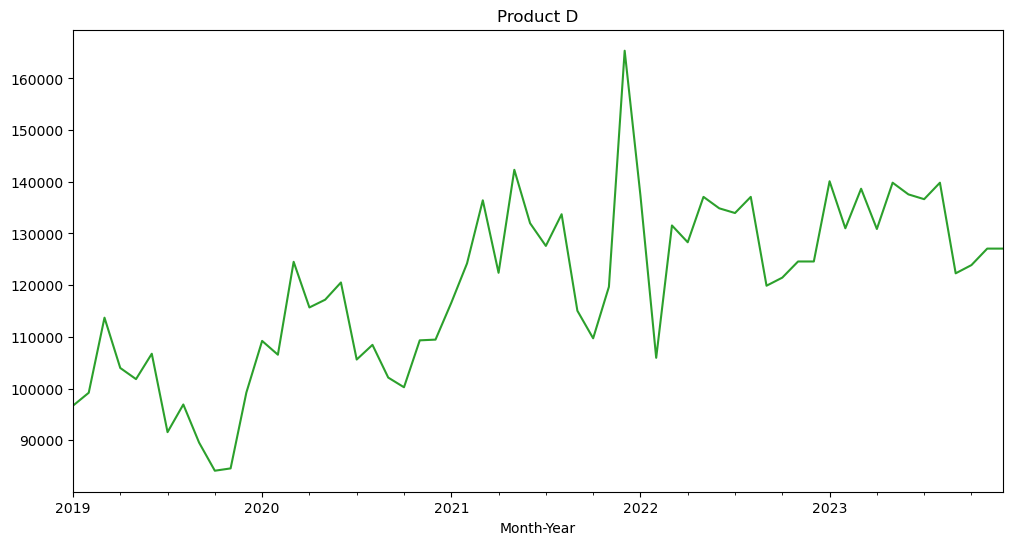

In [6]:
sales_d['Sales'].plot(figsize=(12,6),color=color_pal[2],title='Product D')

<Axes: ylabel='Frequency'>

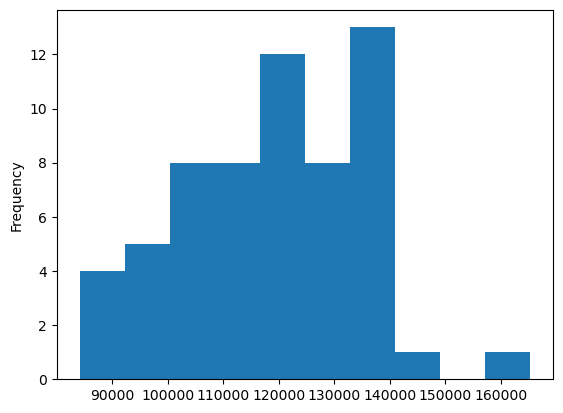

In [7]:
sales_d['Sales'].plot(kind='hist')

# Visualization

In [8]:
sales_d.head()

,Year,Sales,Month No.
Month-Year,,,
2019-01-01,2019,96684,1
2019-02-01,2019,99187,2
2019-03-01,2019,113711,3
2019-04-01,2019,103982,4
2019-05-01,2019,101826,5


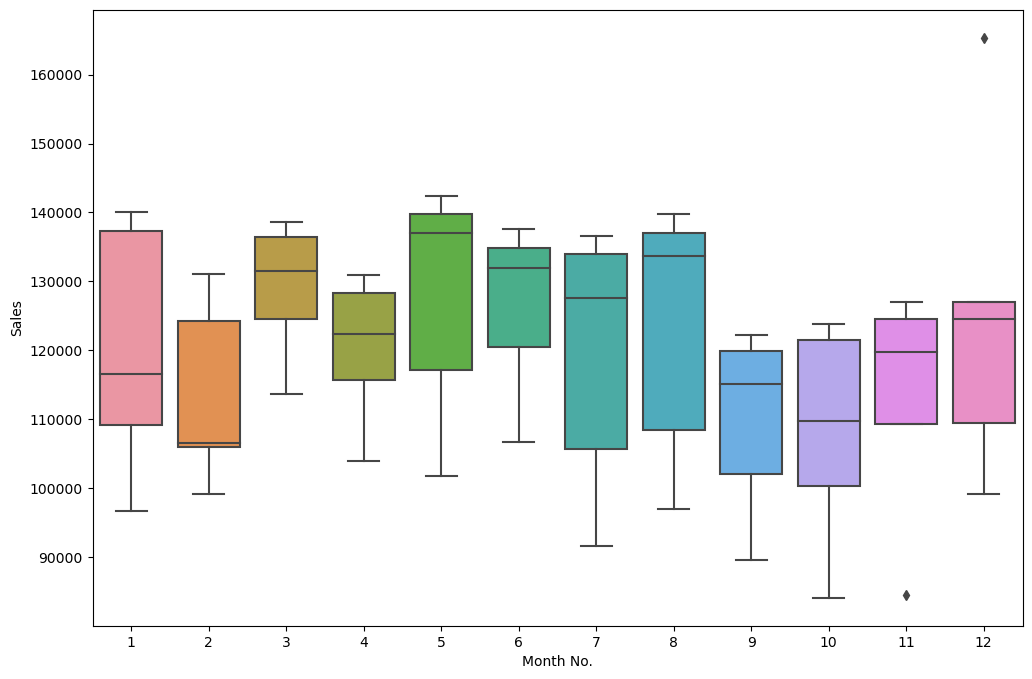

In [9]:
plt.figure(figsize=(12,8))
sns.boxplot(data=sales_d, x='Month No.',y='Sales')
plt.show()

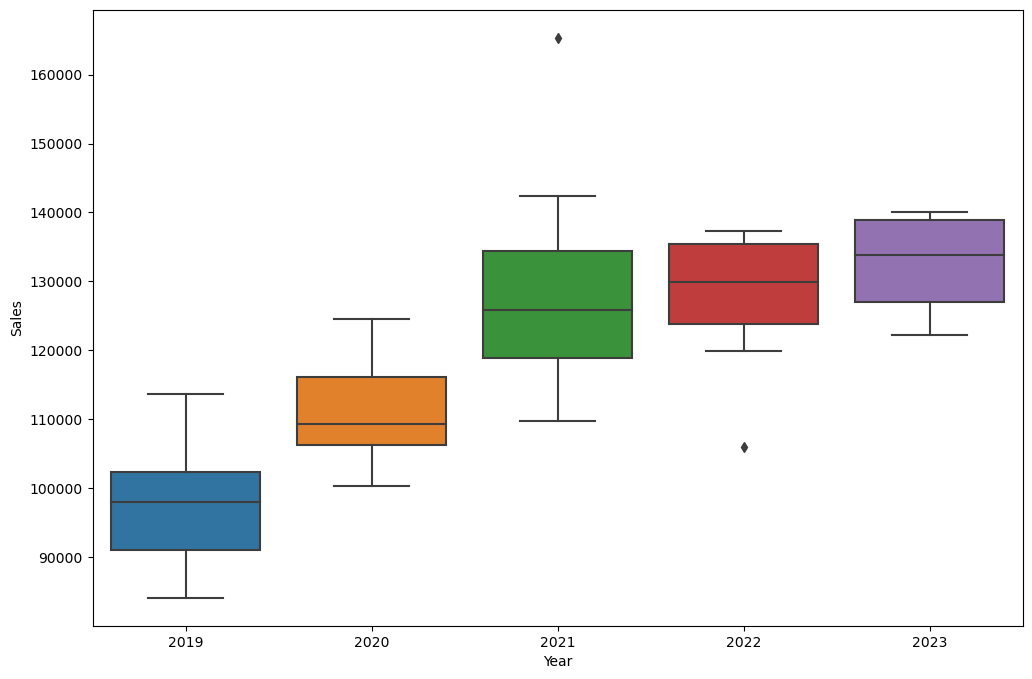

In [10]:
plt.figure(figsize=(12,8))
sns.boxplot(data=sales_d, x='Year',y='Sales')
plt.show()

# Feature Engineering

In [11]:
sales_d = df.drop(['Product Name','Product Category','Month','Market Size', 'Marketing Expense','Month No.','Year'],axis=1)

In [12]:
sales_d['quarter'] = sales_d.index.quarter
sales_d['month'] = sales_d.index.month
sales_d['year'] = sales_d.index.year

In [13]:
print(sales_d)

             Sales  quarter  month  year
Month-Year                              
2019-01-01   96684        1      1  2019
2019-02-01   99187        1      2  2019
2019-03-01  113711        1      3  2019
2019-04-01  103982        2      4  2019
2019-05-01  101826        2      5  2019
2019-06-01  106736        2      6  2019
2019-07-01   91567        3      7  2019
2019-08-01   96918        3      8  2019
2019-09-01   89551        3      9  2019
2019-10-01   84104        4     10  2019
2019-11-01   84553        4     11  2019
2019-12-01   99223        4     12  2019
2020-01-01  109216        1      1  2020
2020-02-01  106546        1      2  2020
2020-03-01  124519        1      3  2020
2020-04-01  115688        2      4  2020
2020-05-01  117190        2      5  2020
2020-06-01  120522        2      6  2020
2020-07-01  105613        3      7  2020
2020-08-01  108451        3      8  2020
2020-09-01  102124        3      9  2020
2020-10-01  100250        4     10  2020
2020-11-01  1093

# Train/Test Split

In [14]:
train= sales_d[:48]
test=sales_d[48:]

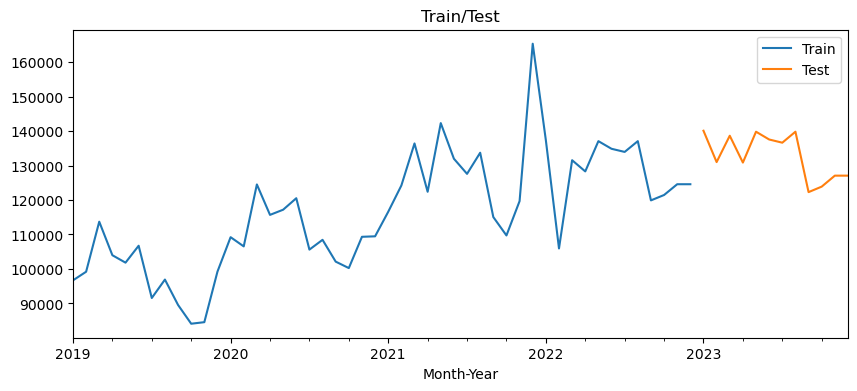

In [15]:
fig,ax=plt.subplots(figsize=(10,4))
train['Sales'].plot(ax=ax,label='Train set',title='Train/Test')
test['Sales'].plot(ax=ax,label='Test set')
plt.legend(['Train','Test'])
plt.show()

In [16]:
len(train)

48

In [17]:
x_train = train.drop(columns=['Sales'])
y_train=train['Sales']
x_test=test.drop(columns=['Sales'])
y_test=test['Sales']

In [18]:
from sklearn.model_selection import GridSearchCV


# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.001,0.01, 0.1, 0.2],
    'n_estimators': [100, 500, 1000, 2000],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'subsample': [0.7, 0.8, 0.9, 1.0]
}

# Instantiate the XGBoost regressor
regressor = xgb.XGBRegressor(objective='reg:squarederror')

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, 
                           cv=5, scoring='neg_mean_squared_error', 
                           verbose=2, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(x_train, y_train)

# Access the best parameters
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best parameters:", best_params)
print("Best estimator:", best_estimator)


Fitting 5 folds for each of 768 candidates, totalling 3840 fits
Best parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}
Best estimator: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


In [18]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=100,
                       objective='reg:squarederror',
                       max_depth=3,
                       colsample_bytree=0.7,
                       subsample= 0.7,
                       early_stopping_rounds=50,
                       learning_rate=0.1)

reg.fit(x_train, y_train,
        eval_set=[(x_train, y_train), (x_test, y_test)],
        verbose=100)

[0]	validation_0-rmse:106138.12837	validation_1-rmse:121691.14584
[99]	validation_0-rmse:5228.05378	validation_1-rmse:7793.28398


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [19]:
reg.best_iteration

85

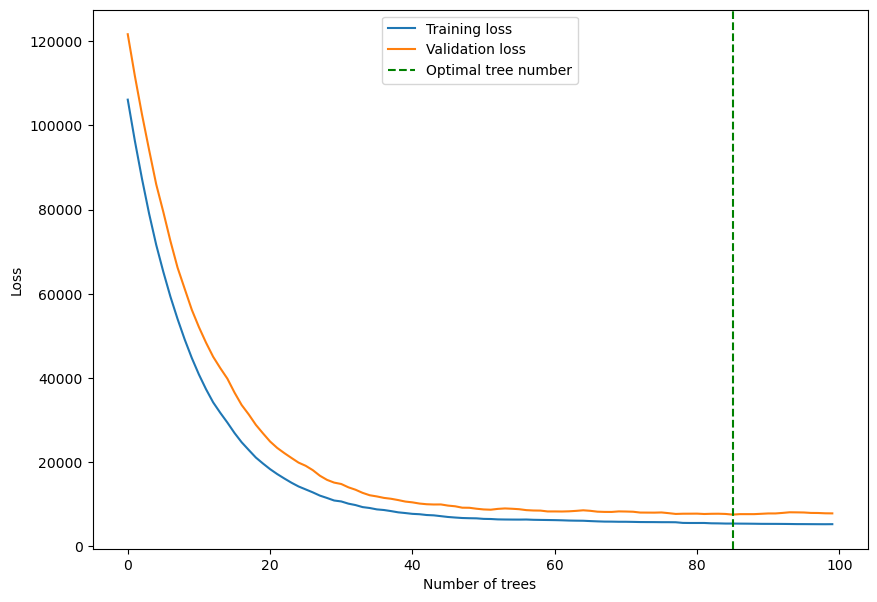

In [20]:
results = reg.evals_result()

plt.figure(figsize=(10,7))
plt.plot(results["validation_0"]["rmse"], label="Training loss")
plt.plot(results["validation_1"]["rmse"], label="Validation loss")
plt.axvline(85,color='green',ls='--', label="Optimal tree number")
plt.xlabel("Number of trees")
plt.ylabel("Loss")
plt.legend()

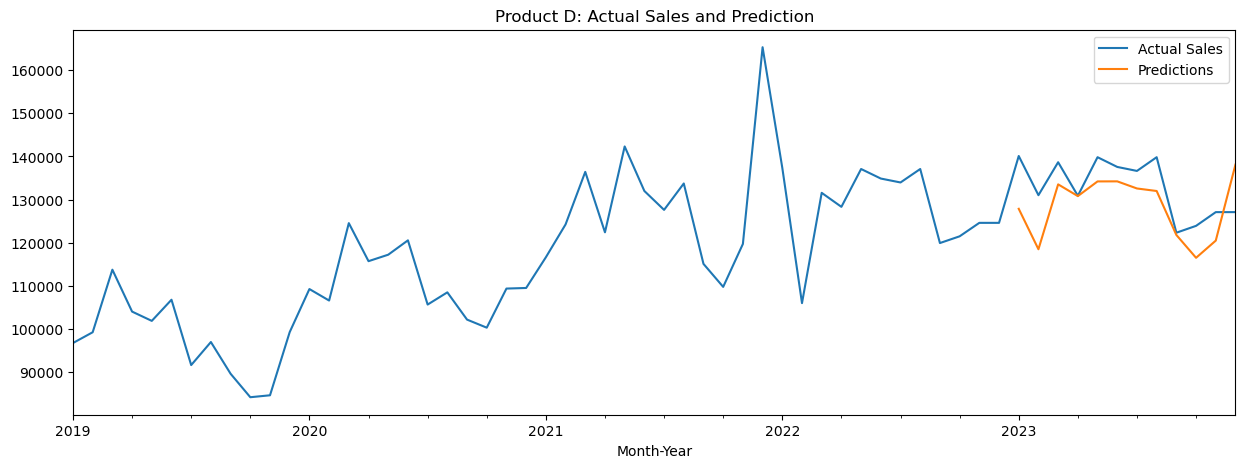

In [21]:
pred=reg.predict(x_test)
sales_d['prediction']=[None]*len(train) + list(pred)

ax = sales_d['Sales'].plot(figsize=(15, 5))
sales_d['prediction'].plot()
plt.legend(['Actual Sales', 'Predictions'])
ax.set_title('Product D: Actual Sales and Prediction')
plt.show()

In [22]:
mae_xgb= mean_absolute_error(test['Sales'],pred)
mse_xgb=mean_squared_error(test['Sales'], pred)
mape_xgb= mean_absolute_percentage_error(test['Sales'],pred)
rmse_xgb= np.sqrt(mean_squared_error(test['Sales'],pred))

print(f'MAE - XGBoost: {mae_xgb:0.3f}')
print(f'MAPE - XGBoost: {mape_xgb:0.3f}')
print(f'MSE - XGBoost: {mse_xgb:0.3f}')
print(f'RMSE - XGBoost: {rmse_xgb:0.3f}')

MAE - XGBoost: 6373.844
MAPE - XGBoost: 0.048
MSE - XGBoost: 56322239.175
RMSE - XGBoost: 7504.814


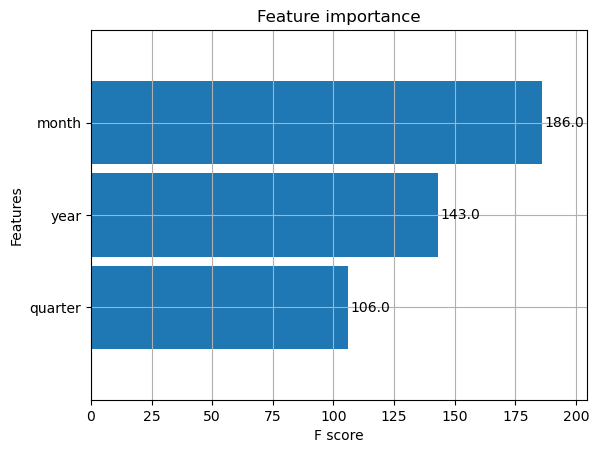

In [23]:
from xgboost import plot_importance

_ = plot_importance(reg, height=0.9)

# FORECASTING

In [24]:
x = sales_d.drop(columns=['Sales','prediction'])
y = sales_d['Sales']

In [25]:
reg_forecast= xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=100,
                       objective='reg:squarederror',
                       max_depth=3,
                       colsample_bytree=0.7,
                       subsample= 0.7,
                       learning_rate=0.1)

reg_forecast.fit(x, y,
        eval_set=[(x, y)],
        verbose=100)

[0]	validation_0-rmse:109186.37145
[99]	validation_0-rmse:4846.14447


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [26]:
future = pd.date_range(start='2024-01-01', end='2024-12-31', freq='MS')
future_df = pd.DataFrame(index=future)
future_df['isFuture'] = True
sales_d['isFuture'] = False
sales_d_and_future = pd.concat([sales_d, future_df])

In [27]:
sales_d_and_future['quarter'] = sales_d_and_future.index.quarter
sales_d_and_future['month'] = sales_d_and_future.index.month
sales_d_and_future['year'] = sales_d_and_future.index.year

In [28]:
sales_d_and_future=sales_d_and_future.drop(columns=['prediction'])

In [29]:
future_w_features = sales_d_and_future.query('isFuture').copy()
future_w_features=future_w_features.drop(columns=['Sales','isFuture'])

In [30]:
future_w_features

,quarter,month,year
2024-01-01,1,1,2024
2024-02-01,1,2,2024
2024-03-01,1,3,2024
2024-04-01,2,4,2024
2024-05-01,2,5,2024
2024-06-01,2,6,2024
2024-07-01,3,7,2024
2024-08-01,3,8,2024
2024-09-01,3,9,2024
2024-10-01,4,10,2024


In [31]:
future_w_features['pred'] = reg_forecast.predict(future_w_features)

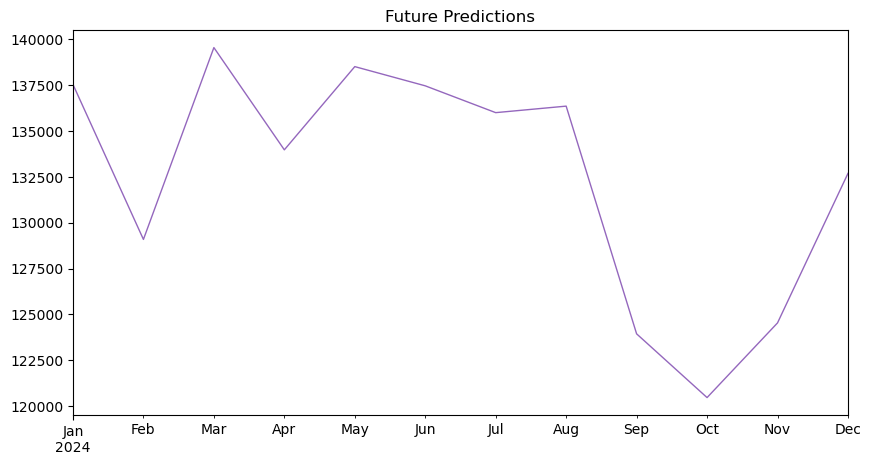

In [32]:
future_w_features['pred'].plot(figsize=(10, 5),
                               color=color_pal[4],
                               ms=1,
                               lw=1,
                               title='Future Predictions')
plt.show()

Text(0.5, 1.0, 'Product D')

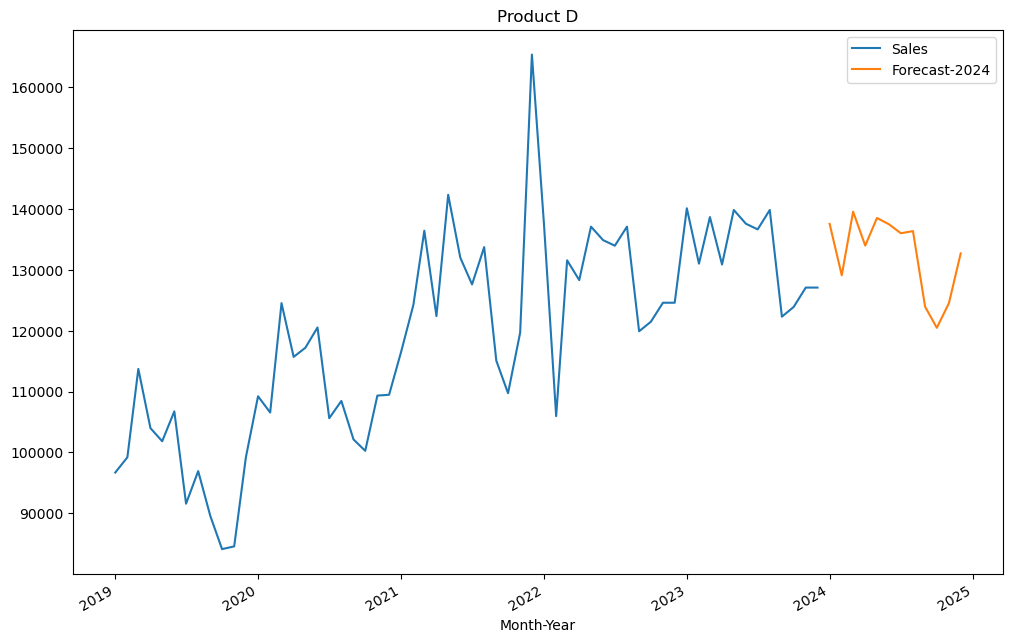

In [34]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_d[['Sales']])
future_w_features['pred'].plot(legend=True, label='Forecast-2024')
plt.title('Product D')